# MolISS Workeshop 2
# Python for Data Analysis
you can find more info here https://education.molssi.org/python-data-analysis/01-numpy-arrays/index.html

## Section 3: Using scipy for data fitting
__Questions__

How do I fit data to a specified function?

How do I assess the quality of my fit?

How do I determine the standard error for my fit parameters?

__Objectives__

Use curve_fit from scipy to fit data to a specified functional form.

### Data fitting
Python is a power tool for fitting data to any functional form. You are no longer limited to the simple linear or polynominal functions you could fit in a spreadsheet program. You can also calculate the standard error for any parameter in a functional fit.

The basic steps to fitting data are:

1. Import the curve_fit function from scipy.
2. Create a list or numpy array of your independent variable (your x values). You might read this data in from another source, like a CSV file.
3. Create a list of numpy array of your depedent variables (your y values). You might read this data in from another source, like a CSV file.
4. Create a function for the equation you want to fit. The function should accept as inputs the independent variable(s) and all the parameters to be fit.
5. Use the function curve_fit to fit your data.
6. Extract the fit parameters from the output of curve_fit.
7. Use your function to calculate y values using your fit model to see how well your model fits the data.
8. Graph your original data and the fit equation.

### Fitting x, y Data
First, import the relevant python modules that will be used.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

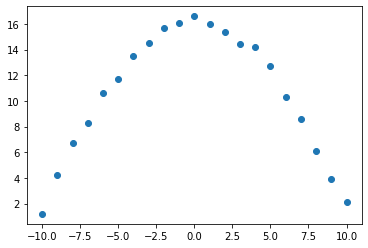

In [14]:
xdata = np.arange(-10.0,11.0) # from -10 to 10
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 
         14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

# make the y data into numpy array instaed of a list
ydata=np.asarray(ydata)

plt.plot(xdata, ydata, 'o')

This data could probably be fit to many functional forms. We will try two different functional forms. (Looking at data and knowing what function it might fit is non-trivial and beyond the scope of this lesson. For purposes of this lesson, we will simply fit the data to given functional forms.)
Also, check out the syntax if you want to know how I write this equation

1. Gaussian Function: $y = Ae^{−Bx^{2}} $
    
2. Cosine Function: $ D cos(Ex) $
    
### Example 1 - the Gaussian function
First, let’s fit the data to the Gaussian function. Our goal is to find the values of A and B that best fit our data. First, we need to write a python function for the Gaussian function equation. The function should accept as inputs __the independent varible (the x-values) and all the parameters that will be fit.__

In [19]:
# define the gauss function, the fit equation
def Gauss(x, A, B):
    y= A * np.exp(-1*B*x**2)
    return y

We will use the function curve_fit from the python module scipy.optimize to fit our data. It uses non-linear least squares to fit data to a functional form. You can learn more about curve_fit by using the help function within the Jupyter notebook or from the scipy online documentation.

The curve_fit function has three required inputs: the function you want to fit, the x-data, and the y-data you are fitting. There are two outputs. The first is an array of the optimal values of the parameters. The second a matrix of the estimated covariance of the parameters from which you can calculate the standard error for the parameters.

In [20]:
parameters, covariance = curve_fit(Gauss, xdata, ydata)

<ipython-input-19-07a6b7956306>:3: RuntimeWarning: overflow encountered in exp
  y= A * np.exp(-1*B*x**2)


The optimized values of A and B are now stored in the list parameters. From this, we can extract our best fit values of A and B and print them.

In [23]:
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A,fit_B)

16.934286340519687 0.015739600927241554


Now we want to see how well our fit equation matched our data. To do this, we will calculate values of y, using our function and the fit values of A and B, and then we will make a plot to compare those calculated values to our data.

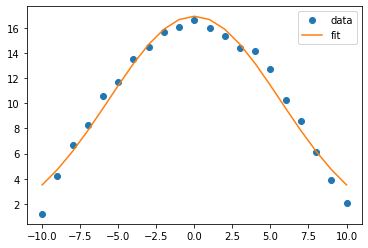

In [26]:
# calculting y values using the function and the fit values 
fit_y = Gauss(xdata, fit_A, fit_B)

#plot the data
plt.plot(xdata, ydata, 'o', label='data')

#the fit equation
plt.plot(xdata, fit_y, '-', label='fit')

plt.legend()


Looks like a good fit!

To calculate the standard error of the parameters from the covariance, you take the square root of the diagonal elements of the matrix. You can do this in one line using functions from numpy.

In [33]:
print(covariance)
print(covariance[0,0],covariance[1,1])

[[1.27149879e-01 1.88214488e-04]
 [1.88214488e-04 7.48572383e-07]]
0.12714987864782426 7.485723832035091e-07


In [39]:
# find standard error
# one way which is less effecnit
SE_A, SE_B = np.sqrt(covariance[0,0]), np.sqrt(covariance[1,1])
print(SE_A, SE_B)

0.3565808164327187 0.000865200776238388


In [56]:
# another way most effient
SE = np.sqrt(np.diag(covariance))
#print(SE)
SE_A, SE_B = SE[0], SE[1]

# print values of pramarter

print(F'The value of A is{fit_A: .5f} with a standard error of{SE_A: .5f}.')
print(F'The value of B is{fit_B: .5f} with a standard error of{SE_B: .5f}.')


The value of A is 16.93429 with a standard error of 3.88195.
The value of B is 0.01574 with a standard error of 0.86423.


### Example 2 - the cosine function
The cosine function proves to be a bit trickier. If we approach the problem as we do above, we see from the graph that we don’t get a good fit.

In [52]:
def cos_func(x, D, E):
    y = D * np.cos(E*x)
    return y

The value of D is 0.68226 with a standard error of 3.88195.
The value of E is 0.85835 with a standard error of 0.86423.


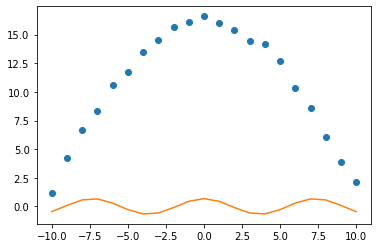

In [57]:
parameters, covariance = curve_fit(cos_func, xdata, ydata)

fit_D, fit_E = parameters[0], parameters[1]

fit_cos = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label= 'data')
plt.plot(xdata, fit_cos, '-', label= 'fit cos')

SE_D, SE_E = np.sqrt(covariance[0,0]), np.sqrt(covariance[1,1])

print(F'The value of D is{fit_D: .5f} with a standard error of{SE_D: .5f}.')
print(F'The value of E is{fit_E: .5f} with a standard error of{SE_E: .5f}.')


To fix this, we need to give a guess for what we think our parameters are. Thinking about the form of the cosine function, the height of the function is controlled by the D parameter. Looking at our graph, it seems the value of D is somewhere between 15 and 17, so we will guess 16. Similarly, the E parameter tells us how many cycles occur over the 0 to 2 $\pi$ interval. This is a very wide graph; there is clearly much less than one cycle between 0 and 2 $\pi$, so we will guess that E is 0.1. To incorporate these guesses into our code, we will create a new array called guess. We then specify our guess when we call curve_fit.

The value of D is 16.31473 with a standard error of 0.11091.
The value of E is 0.14649 with a standard error of 0.00090.


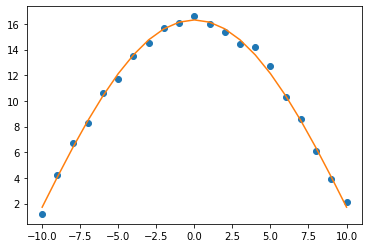

In [63]:
guess = [16, 0.1]

parameters, covariance = curve_fit(cos_func, xdata, ydata, p0=guess) # intial guess for parameters

# the rest is the same

fit_D, fit_E = parameters[0], parameters[1]

fit_cos = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label= 'data')
plt.plot(xdata, fit_cos, '-', label= 'fit cos')

SE_D, SE_E = np.sqrt(covariance[0,0]), np.sqrt(covariance[1,1])

print(F'The value of D is{fit_D: .5f} with a standard error of{SE_D: .5f}.')
print(F'The value of E is{fit_E: .5f} with a standard error of{SE_E: .5f}.')


Now that looks like a good fit!

Frequently, you will have to adjust your guesses to get a good fit for your data. If you understand the physical significance of your data and the equation you are trying to fit, you will have an easier time fitting your data.

### Exercise - Fitting a Lennard-Jones potential

Consider the following data computed for a helium dimer. The interaction energy at several different internuclear separations is given. Fit this data to a Lennard-Jones potential.

$ V = 4\epsilon[(\sigma/r)^{12} - (\sigma/r)^{6}]$

In [68]:
# Internuclear separation in angstroms
distances = [2.875, 3.0, 3.125, 3.25, 3.375, 3.5, 3.75, 4.0, 4.5, 5.0, 6.0]
# Energy in Wavenumbers
energies = [0.35334378061169025, -2.7260131253801405, -4.102738968283382, -4.557042640311599, 
            -4.537519193684069, -4.296388508321034, -3.6304745046204117, -3.0205368595885536, 
            -2.1929538006724814, -1.7245616790238782, -1.2500789753171557]

The value of epsilon is 4.857 wavenumbers with a standard error of 0.30816.
The value of sigma is 2.893 angstroms with a standard error of 0.01333.


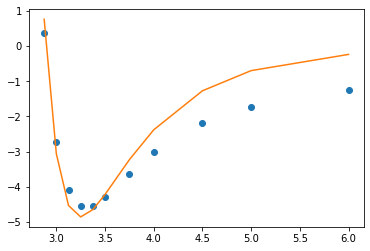

In [75]:
# make them into arrays
distances = np.asarray(distances)
energies = np.asarray(energies)

# plot them 
plt.plot(distances,energies, 'o', label='data')

# define a function
def LJP(distances, eps, sigma):
    V = 4*eps *((sigma/distances)**12 - (sigma/distances)**6)
    return V

# use the curve_fit
parameters, covariance = curve_fit(LJP, distances, energies)
fit_eps, fit_sigma = parameters[0], parameters[1]

# fit the function
fit_LJP = LJP(distances, fit_eps, fit_sigma)

#plot the fit
plt.plot(distances, fit_LJP, '-', label='fit')

#find SE
SE_eps, SE_sigma = np.sqrt(covariance[0,0]), np.sqrt(covariance[1,1])

#print
print(F'The value of epsilon is{fit_eps: .3f} wavenumbers with a standard error of{SE_eps: .5f}.')
print(F'The value of sigma is{fit_sigma: .3f} angstroms with a standard error of{SE_sigma: .5f}.')

## KEY POINTS
Recasting your data to numpy arrays lets you utilize features like broadcasting, which can be helpful in evaluating functions.

If the initial fit model does not match the data well, use the bounds argument of fit_curve to guess a range of values for the fit parameters.